In [18]:
import cv2
import numpy as np
from common_functions import *


In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def kmeans(image_rgb):

    # Reshape the image into a 2D array of pixels and 3 color values (RGB)
    pixel_values = image_rgb.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Define criteria, number of clusters (K), and apply K-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 2  # Number of clusters
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert centers to uint8 (RGB values)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image_rgb.shape)

    # Create a mask for the cluster corresponding to the statue
    l = labels.copy()
    labels = labels.flatten()
    mask = (labels == 0)  # Adjust based on which cluster corresponds to the statue
    segmented_mask = mask.reshape(image_rgb.shape[:2])

    # Apply mask to the original image
    statue_segmented = cv2.bitwise_and(image_rgb, image_rgb, mask=segmented_mask.astype(np.uint8))

    return labels



In [20]:
# Load the image
image = cv2.imread('../imgs/24.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
labels = kmeans(image_rgb)
list = []


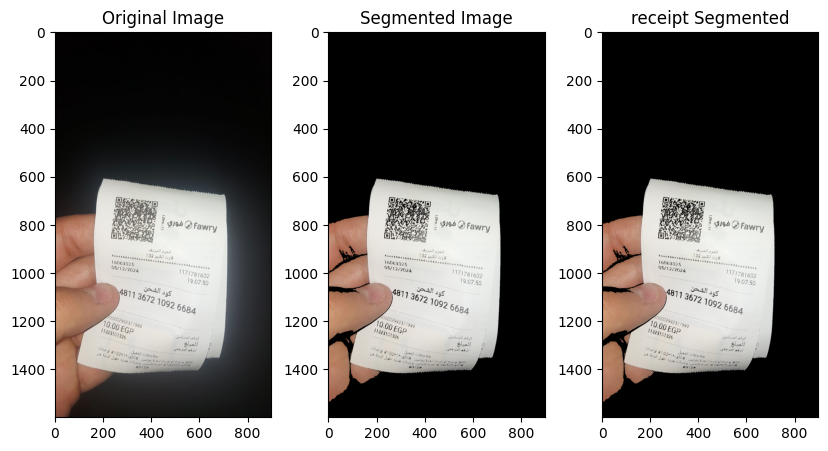

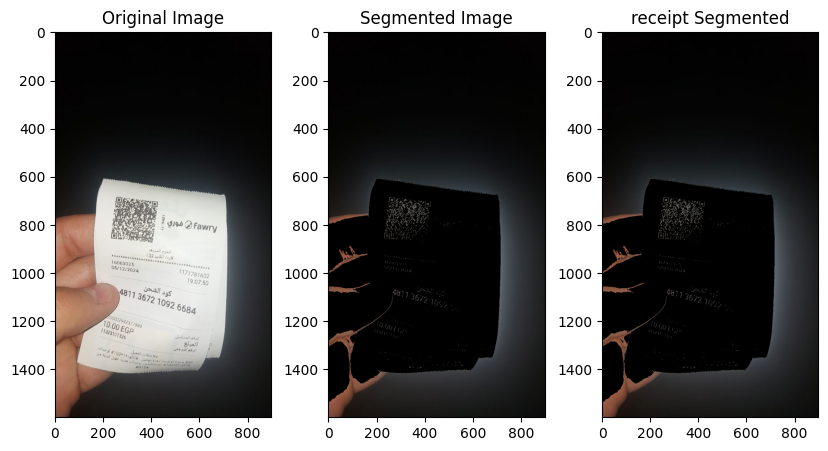

In [21]:
for i in range(2):
    mask = (labels == i)  # Adjust based on which cluster corresponds to the statue
    segmented_mask = mask.reshape(image_rgb.shape[:2])

    # Apply mask to the original image
    statue_segmented = cv2.bitwise_and(image_rgb, image_rgb, mask=segmented_mask.astype(np.uint8))
    list.append(statue_segmented)

    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(image_rgb)

    plt.subplot(1, 3, 2)
    plt.title("Segmented Image")
    plt.imshow(statue_segmented )

    plt.subplot(1, 3, 3)
    plt.title("receipt Segmented")
    plt.imshow(statue_segmented)
    plt.show()